In [59]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics

import acquire
import prepare

from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime
import seaborn as sns
from env import host, user, password
from acquire import get_titanic_data, get_iris_data, get_iris_df, get_titanic_df
from prepare import titanic_split, clean_data
import matplotlib.pyplot as plt

### Model Building Exercise: Decision Tree

#### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
df = get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [41]:
df = clean_data(df)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


##### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [42]:
train, validate, test = titanic_split(df)
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [43]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [44]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [45]:
train['baseline_survived'] = 0
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_survived
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1,0
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1,0
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1,0
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0,0


In [25]:
## Calculating baseline accuracy for survived

(train.survived == train.baseline_survived).mean()

## Since there are more deaths than survivors the baseline prediction is gonna be 0 which represents
## a false boolean value in survived.

## We can then compare our baseline_survived to our survived and determine a 61.65% baseline 
## accuracy

0.6164658634538153

##### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [53]:
validate['baseline_survived'] = 0
validate.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_survived
610,610,0,3,female,1,5,31.2750,Southampton,0,0,0,1,0
424,424,0,3,male,1,1,20.2125,Southampton,0,1,0,1,0
568,568,0,3,male,0,0,7.2292,Cherbourg,1,1,0,0,0
334,334,1,1,female,1,0,133.6500,Southampton,0,0,0,1,0
101,101,0,3,male,0,0,7.8958,Southampton,1,1,0,1,0


In [56]:
X_cols = ['pclass', 'alone', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]


model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 81.12%
validate score: 76.17%


[Text(669.6, 587.0880000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(395.6727272727273, 456.624, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = survived'),
 Text(243.4909090909091, 326.1600000000001, 'alone <= 0.5\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = survived'),
 Text(121.74545454545455, 195.69600000000003, 'pclass <= 1.5\ngini = 0.073\nsamples = 53\nvalue = [2, 51]\nclass = survived'),
 Text(60.872727272727275, 65.23200000000008, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]\nclass = survived'),
 Text(182.61818181818182, 65.23200000000008, 'gini = 0.077\nsamples = 25\nvalue = [1, 24]\nclass = survived'),
 Text(365.23636363636365, 195.69600000000003, 'pclass <= 1.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]\nclass = survived'),
 Text(304.3636363636364, 65.23200000000008, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass = survived'),
 Text(426.1090909090909, 65.23200000000008, 'gini = 0.091

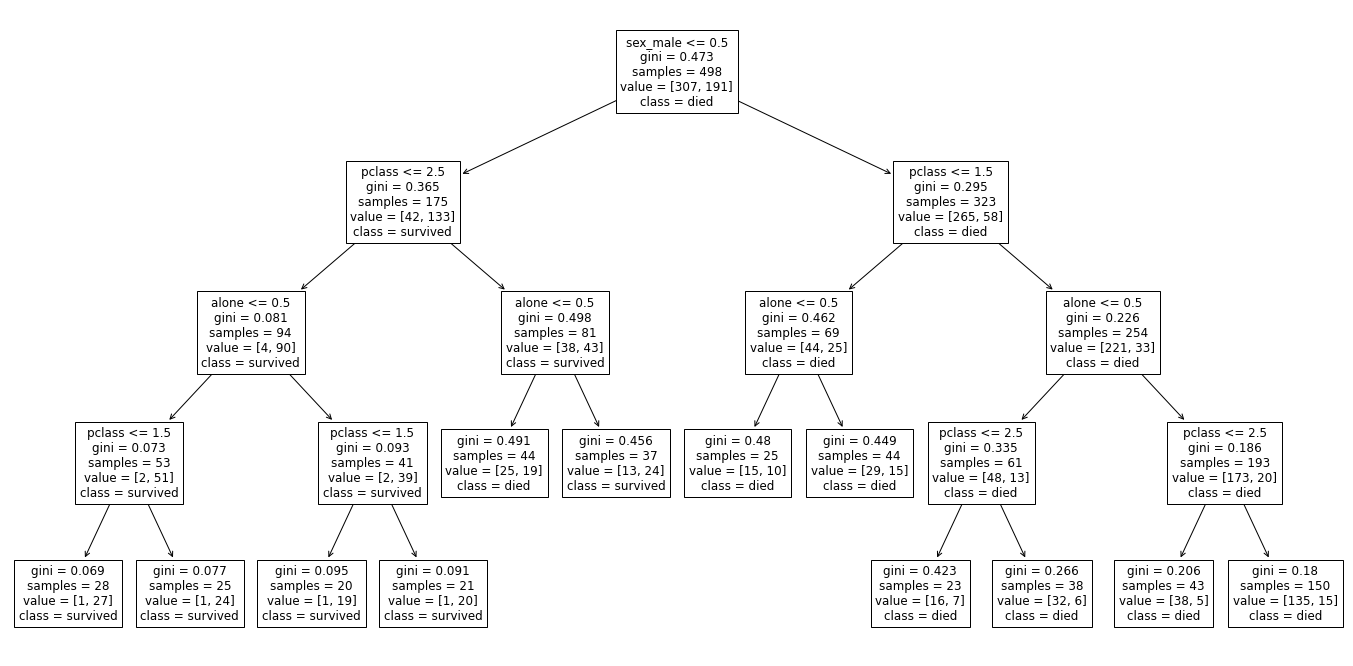

In [55]:
plt.figure(figsize=(24, 12))
plot_tree(
    model1,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [65]:
train['model1'] = model1.predict(X_train) ##make X_train predictions and column
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_survived,model1
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1,0,0
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1,0,0
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0,0,1


##### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [57]:
model1.score(X_train, y_train) ## using score to calculate a 81.12% 

0.8112449799196787

In [64]:
class_report = sklearn.metrics.classification_report(train.survived, train.model1)
print(f'Classification model report:\n\n{class_report}\n')

Classification model report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       307
           1       0.87      0.60      0.71       191

    accuracy                           0.81       498
   macro avg       0.83      0.77      0.78       498
weighted avg       0.82      0.81      0.80       498




In [66]:
pd.crosstab(train.model1, train.survived)

survived,0,1
model1,,
0,290,77
1,17,114


##### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support using validate



In [67]:
model2 = DecisionTreeClassifier()
model2.fit(X_validate, y_validate)

DecisionTreeClassifier()

In [68]:
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

validate score: 76.17%


In [69]:
validate['model2'] = model2.predict(X_validate) ##make X_validate predictions and column
validate.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_survived,model2
610,610,0,3,female,1,5,31.2750,Southampton,0,0,0,1,0,0
424,424,0,3,male,1,1,20.2125,Southampton,0,1,0,1,0,0
568,568,0,3,male,0,0,7.2292,Cherbourg,1,1,0,0,0,0
334,334,1,1,female,1,0,133.6500,Southampton,0,0,0,1,0,1
101,101,0,3,male,0,0,7.8958,Southampton,1,1,0,1,0,0


[Text(581.4947368421053, 587.0880000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 214\nvalue = [132, 82]\nclass = died'),
 Text(281.93684210526317, 456.624, 'pclass <= 2.5\ngini = 0.419\nsamples = 77\nvalue = [23, 54]\nclass = survived'),
 Text(140.96842105263158, 326.1600000000001, 'pclass <= 1.5\ngini = 0.184\nsamples = 39\nvalue = [4, 35]\nclass = survived'),
 Text(70.48421052631579, 195.69600000000003, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = survived'),
 Text(211.45263157894738, 195.69600000000003, 'alone <= 0.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = survived'),
 Text(140.96842105263158, 65.23200000000008, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = survived'),
 Text(281.93684210526317, 65.23200000000008, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = survived'),
 Text(422.90526315789475, 326.1600000000001, 'alone <= 0.5\ngini = 0.5\nsamples = 38\nvalue = [19, 19]\nclass = died'),
 Text(352.42105263157896, 195.69600000000003, 'gini = 0.5\

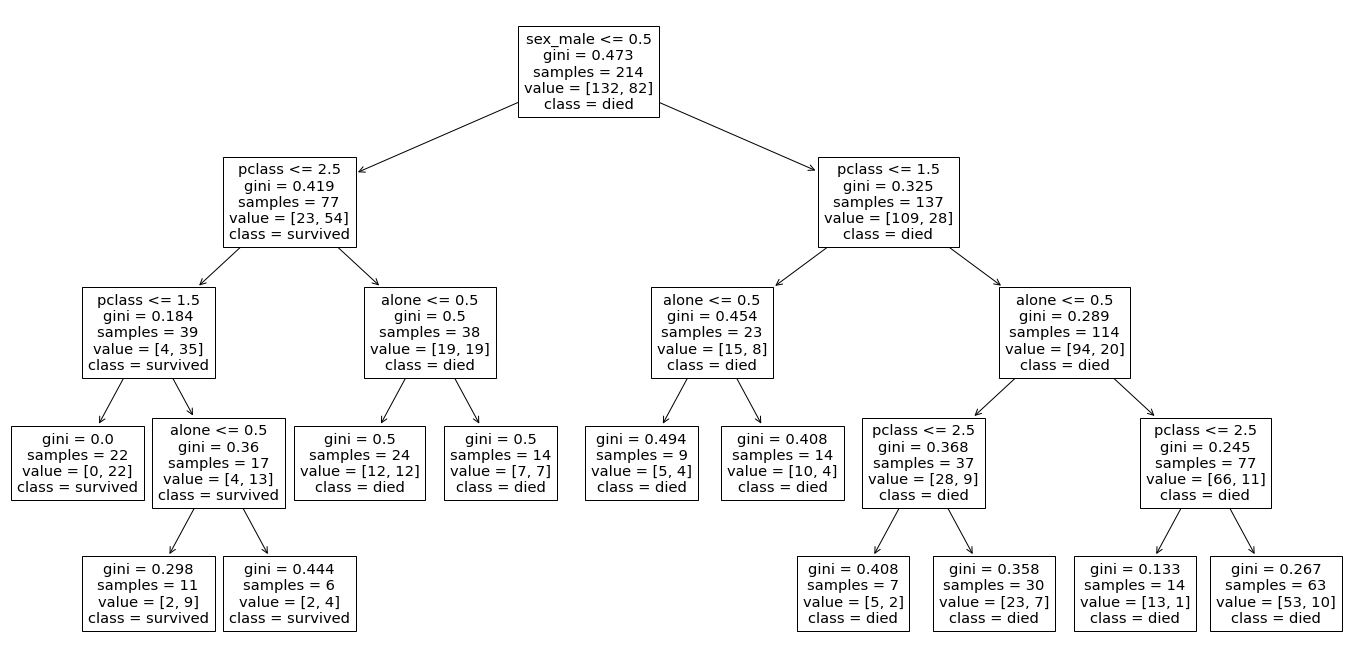

In [78]:
plt.figure(figsize=(24, 12))
plot_tree(
    model2,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [70]:
class_report2 = sklearn.metrics.classification_report(validate.survived, validate.model2)
print(f'Classification model report:\n\n{class_report2}\n')

Classification model report:

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       132
           1       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214




In [71]:
pd.crosstab(validate.model2, validate.survived)

survived,0,1
model2,,
0,128,47
1,4,35


##### Run through steps 2-4 using a different max_depth value.



In [80]:
model3 = DecisionTreeClassifier(max_depth = 3)
model3.fit(X_train, y_train)

print(f'training score: {model3.score(X_train, y_train):.2%}')
print(f'validate score: {model3.score(X_validate, y_validate):.2%}')

training score: 81.12%
validate score: 76.17%


[Text(669.6, 570.7800000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(334.8, 407.70000000000005, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = survived'),
 Text(167.4, 244.62, 'alone <= 0.5\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = survived'),
 Text(83.7, 81.53999999999996, 'gini = 0.073\nsamples = 53\nvalue = [2, 51]\nclass = survived'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.093\nsamples = 41\nvalue = [2, 39]\nclass = survived'),
 Text(502.20000000000005, 244.62, 'alone <= 0.5\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = survived'),
 Text(418.5, 81.53999999999996, 'gini = 0.491\nsamples = 44\nvalue = [25, 19]\nclass = died'),
 Text(585.9, 81.53999999999996, 'gini = 0.456\nsamples = 37\nvalue = [13, 24]\nclass = survived'),
 Text(1004.4000000000001, 407.70000000000005, 'pclass <= 1.5\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = died'),
 Text(837.0, 244.62, 'al

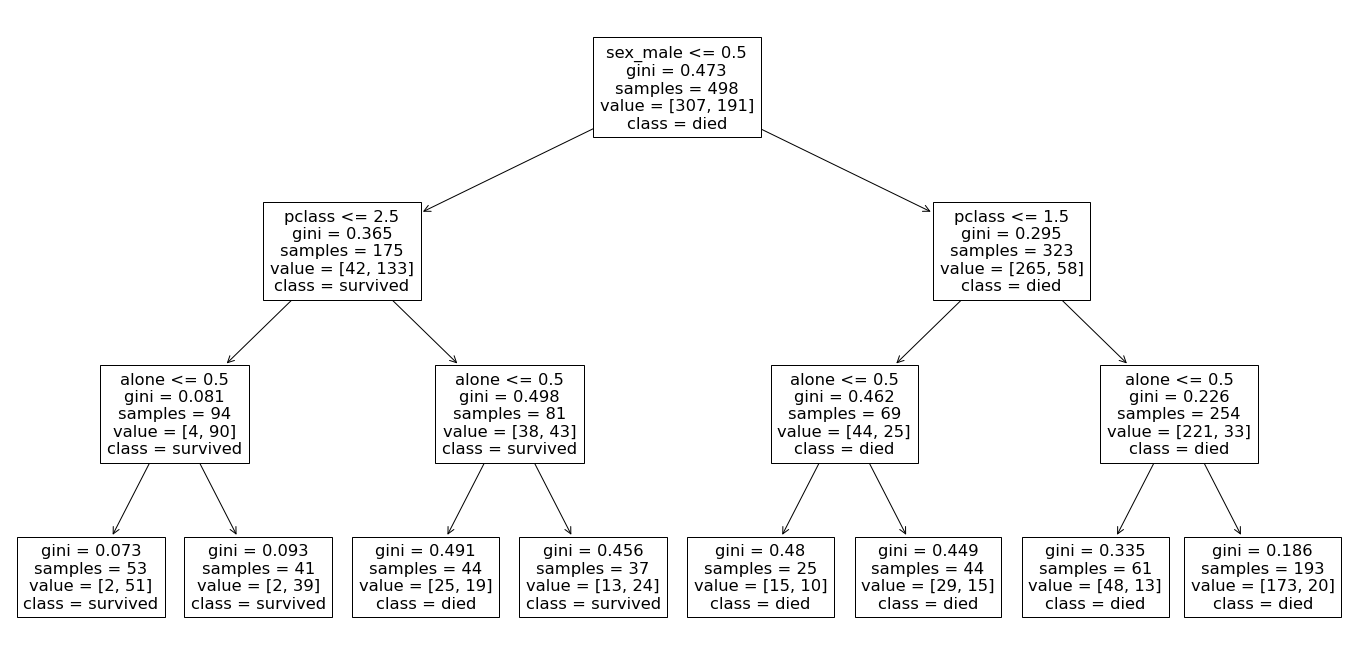

In [81]:
plt.figure(figsize=(24, 12))
plot_tree(
    model3,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [82]:
train['model3'] = model3.predict(X_train) ##make X_train predictions and column
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_survived,model1,model3
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0,0,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1,0,0,0
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1,0,0,0
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1,0,1,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0,0,1,1


In [83]:
class_report3 = sklearn.metrics.classification_report(train.survived, train.model3)
print(f'Classification model report:\n\n{class_report3}\n')

Classification model report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       307
           1       0.87      0.60      0.71       191

    accuracy                           0.81       498
   macro avg       0.83      0.77      0.78       498
weighted avg       0.82      0.81      0.80       498




In [84]:
pd.crosstab(train.model3, train.survived)

survived,0,1
model3,,
0,290,77
1,17,114


##### Which model performs better on your in-sample data?
       -Using the classification reports for each model (model1, model2, and model3)
       We can see that model 1 and model 3 perform the best on the train data set. Model 3 is simply where 


In [85]:
print(f'Classification model report:\n\n{class_report3}\n')

Classification model report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       307
           1       0.87      0.60      0.71       191

    accuracy                           0.81       498
   macro avg       0.83      0.77      0.78       498
weighted avg       0.82      0.81      0.80       498




In [86]:
print(f'Classification model report:\n\n{class_report2}\n')

Classification model report:

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       132
           1       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214




In [87]:
print(f'Classification model report:\n\n{class_report}\n')

Classification model report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       307
           1       0.87      0.60      0.71       191

    accuracy                           0.81       498
   macro avg       0.83      0.77      0.78       498
weighted avg       0.82      0.81      0.80       498




##### Which model performs best on your out-of-sample data, the validate set?